# Tutorial on ProfileHistogram

In [1]:
from matplotlib import pyplot as plt
import poisson_approval as pa

## Profile

Generate a random profile:

In [2]:
generator_profile = pa.GeneratorProfileHistogramUniform(n_bins = 10)
profile = generator_profile()
profile

<abc: 0.2690623935284776 [0.02696769 0.03557842 0.01251176 0.22013726 0.26670373 0.14432914
 0.06733686 0.03320928 0.19062748 0.00259839], acb: 0.004194732555969027 [0.04573455 0.03998229 0.13365088 0.12191452 0.08396889 0.10802076
 0.13378233 0.15633912 0.10328862 0.07331804], bac: 0.3329067586796971 [5.33170897e-02 5.12471595e-01 3.55416347e-02 2.58778204e-02
 2.49800253e-04 6.54430835e-02 1.70878321e-01 3.61654692e-02
 2.78413837e-02 7.22138022e-02], bca: 0.21220137424032337 [0.17791499 0.14963264 0.08231313 0.16979015 0.02042343 0.10778814
 0.11527432 0.00184213 0.04286339 0.13215768], cab: 0.06367750472036071 [0.04320671 0.00605101 0.29843443 0.02107376 0.33554684 0.15916992
 0.03257756 0.01708445 0.0429468  0.04390852], cba: 0.11795723627517218 [0.10366437 0.01454906 0.11201012 0.31686785 0.06447532 0.10193769
 0.08908018 0.10034689 0.06455423 0.03251429]> (Condorcet winner: b)

Share of each ranking:

In [3]:
profile.d_ranking_share

{abc: 0.2690623935284776, acb: 0.004194732555969027, bac: 0.3329067586796971, bca: 0.21220137424032337, cab: 0.06367750472036071, cba: 0.11795723627517218}

Distribution of the utilities for voters $abc$:

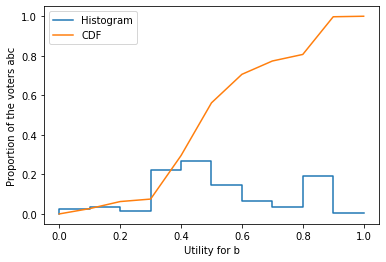

In [4]:
ranking = 'abc'
profile.plot_histogram(ranking, label='Histogram')
profile.plot_cdf(ranking, label='CDF')
plt.ylabel('Proportion of the voters %s' % ranking)
plt.legend()

## Strategic Analysis

Generate a random strategy:

In [5]:
generator_strategy = pa.GeneratorStrategyThresholdUniform()
strategy = generator_strategy()
strategy

<abc: utility-dependent (0.280087855517808), acb: utility-dependent (0.8602132465675677), bac: utility-dependent (0.2004880191646491), bca: utility-dependent (0.7764943667416055), cab: utility-dependent (0.9500942850916189), cba: utility-dependent (0.6249042430067644)>

Tau vector (ballot shares) associated to the strategy in the given profile:

In [6]:
tau = profile.tau(strategy)
tau

<a: 0.023239717164007433, ab: 0.39403161494654654, ac: 0.0018752890356885797, b: 0.36338239650277043, bc: 0.06840897469236464, c: 0.1490620076586224> ==> b

Is the strategy an equilibrium for the given profile?

In [7]:
profile.is_equilibrium(strategy)

EquilibriumStatus.NOT_EQUILIBRIUM

Use iterated voting to search for an equilibrium:

In [8]:
result = profile.iterated_voting(init=strategy, n_max_episodes=1000, 
                                 ballot_update_ratio=0.1)
cycle_taus_actual = result['cycle_taus_actual']
cycle_strategies = result['cycle_strategies']

In [9]:
cycle_taus_actual

[<ab: 0.26906239352847794, ac: 0.06787223727632968, b: 0.5451081329200201, c: 0.11795723627517235> ==> b]

In [10]:
if len(cycle_taus_actual) == 0:
    print('No convergence.')
elif len(cycle_taus_actual) == 1:
    print('Convergence to an equilibrium.')
    print('Limit strategy: %s' % cycle_strategies[0])
    print('Limit tau-vector: %s' % cycle_taus_actual[0])
else:
    print('Convergence to a cycle of cardinality %s.' % len(cycle_taus_actual))

Convergence to an equilibrium.
Limit strategy: <abc: ab, acb: ac, bac: b, bca: b, cab: ac, cba: c> ==> b
Limit tau-vector: <ab: 0.26906239352847794, ac: 0.06787223727632968, b: 0.5451081329200201, c: 0.11795723627517235> ==> b


There is another version of iterated voting, ``fictitious_play``. It allows for update ratios that depend on time, it is faster, but it is not able to detect limit cycles (only convergence). Cf. Reference section for more information.

In [11]:
from math import log
result = profile.fictitious_play(init=strategy, n_max_episodes=1000, 
                                 perception_update_ratio=pa.one_over_log_t_plus_two,
                                 ballot_update_ratio=0.1)
limit_tau = result['tau']
limit_strategy = result['strategy']

In [12]:
if limit_tau is None:
    print('No convergence.')
else:
    print('Convergence to an equilibrium.')
    print('Limit strategy: %s' % limit_strategy)
    print('Limit tau-vector: %s' % limit_tau)

Convergence to an equilibrium.
Limit strategy: <abc: ab, acb: ac, bac: b, bca: b, cab: ac, cba: c> ==> b
Limit tau-vector: <ab: 0.2690623935284776, ac: 0.06787223727632974, b: 0.5451081329200205, c: 0.11795723627517218> ==> b


The methods ``iterated_voting`` and ``fictitious_play`` also provide the winning frequency of each candidate. In case of convergence to a limit or a periodical orbit, these frequencies are computed at the limit. In case of non-convergence, it gives the winning frequencies on the history of the process.

In [13]:
result = profile.iterated_voting(init=strategy, n_max_episodes=10, 
                                 ballot_update_ratio=0.1)
result['d_candidate_winning_frequency']

{b: 1}

If you want to convert these winning frequencies to an array, you can use the function ``d_candidate_value_to_array``:

In [14]:
pa.d_candidate_value_to_array(result['d_candidate_winning_frequency'])

array([0, 1, 0])